In [0]:
#The purpose of this script is to build a spam message detector using for SMS 
#text message data.
#This will use Naive Bayes
#Classifier assigns messages to either the "ham" or "spam" class.
#Dataset from Kaggle.com: https://www.kaggle.com/uciml/sms-spam-collection-dataset
#
#Code is by JB from jamdatajam on GitHub

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files #this is for importing into Google's Colaboratory
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud

In [0]:
#this line is only necessary if you are using colaboratory
#data = files.upload()

In [0]:
#read the csv
df = pd.read_csv('spam.csv', encoding='ISO-8859-1') #encoding fo non-standard characters

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [0]:
#drop some unnamed columns that are NaNs
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
df.columns = ['labels', 'data'] #clean up the feature names

In [9]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
#Now add binomial classification data (ie, ham/spam = 0/1)
df['binary_labels']= df ['labels'].map({'ham': 0, 'spam':1})

In [0]:
#then make an output matrix of those labels
output_y = df['binary_labels'].as_matrix()

In [12]:
output_y

array([0, 0, 1, ..., 0, 0, 0])

In [0]:
tfidf = TfidfVectorizer(decode_error = 'ignore')
input_X = tfidf.fit_transform(df['data'])

In [0]:
#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(input_X, output_y, test_size=0.33)

In [15]:
#build a model
model = MultinomialNB()
model.fit(X_train, y_train)
print("Training accuracy: ", model.score(X_train, y_train))
print("Testing accuracy: ", model.score(X_test, y_test))

Training accuracy:  0.9651754620948299
Testing accuracy:  0.9548667754214247


In [0]:
#the accuracies are 96% for the training set, which drops to 95.6% (or so) when 
#using the testing data; seems pretty good!

In [0]:
############
#Now, why not make it into a word cloud to make fancy data science happen?
############

In [0]:
def wordclouder(label):
  words = ''
  for msg in df[df['labels'] == label]['data']:
    msg = msg.lower()
    words += msg + ' '
  wordcloud = WordCloud(width = 1000, height = 700).generate(words)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

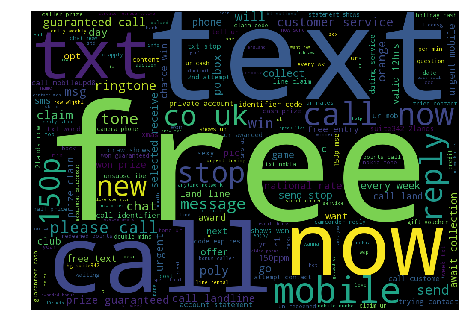

In [19]:
wordclouder('spam')

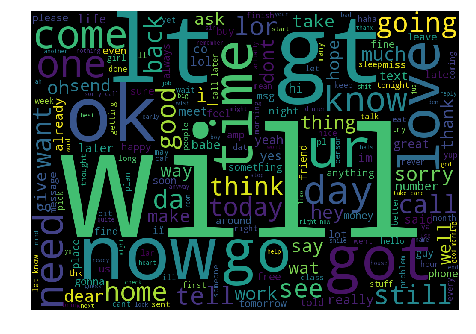

In [20]:
wordclouder('ham')

In [0]:
############
#Now why not see how well our model is doing, eh?
############

In [0]:
#new column of data predicted based on our inputs
df['predicted'] = model.predict(input_X)

In [23]:
df.head()

,labels,data,binary_labels,predicted
0,ham,"Go until jurong point, crazy.. Available only ...",0,0
1,ham,Ok lar... Joking wif u oni...,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,1
3,ham,U dun say so early hor... U c already then say...,0,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,0


In [0]:
#now figure out how much spam is able to bypass the system
sneaky_sneaky_spam = df[(df['predicted'] == 0) & (df['binary_labels'] == 1)]['data']
#for msg in sneaky_sneaky_spam:
  #print(msg) #prints out examples of the spam messages that were misclassified
  #so then we can go through and find more keywords to manually define as spam indicators

In [0]:
#Now find the not spams that were classed as spam
not_spam = df[(df['predicted'] == 1) & (df['binary_labels'] == 0)]['data']
#for msg in not_spam:
  #print(msg)